# Import dataset

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

In [106]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train = train.sample(frac=1).reset_index(drop=True)

In [107]:
def basic_data_info(df):
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    display(df.head(15))

In [108]:
pd.set_option('display.max_colwidth', None)
basic_data_info(train)

Number of rows: 891
Number of columns: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
1,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
2,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
3,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
4,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
5,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
6,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S
7,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
8,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
9,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S


In [109]:
basic_data_info(test)

Number of rows: 418
Number of columns: 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Data exploration

In [110]:
explore = train.copy()

## Labels

Survived
0    549
1    342
Name: count, dtype: int64
0.3838383838383838


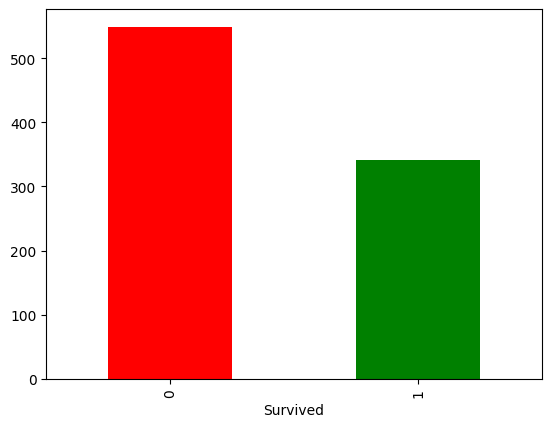

In [139]:
train['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
print(train['Survived'].value_counts())
print(train['Survived'].sum()/train['Survived'].count())4

## Features

Survived - 0: No, 1: Yes

In [111]:
for col in explore.columns:
    print(col, train[col].nunique(), end=', ')

PassengerId 891, Survived 2, Pclass 3, Name 891, Sex 2, Age 88, SibSp 7, Parch 7, Ticket 681, Fare 248, Cabin 147, Embarked 3, 

In [112]:
# Check for NaN counts in all columns for both train and test datasets
print("NaN counts in train dataset:")
print(train.isna().sum())

print("\nNaN counts in test dataset:")
print(test.isna().sum())

NaN counts in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NaN counts in test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Pclass

In [113]:
def display_correlation(df, x_name, y_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x_name, hue=y_name)
    plt.title('Survived vs Not Survived for Each ' + x_name)
    plt.xlabel(x_name)
    plt.ylabel('Count')
    plt.legend(title=y_name, loc='upper right')
    plt.show()

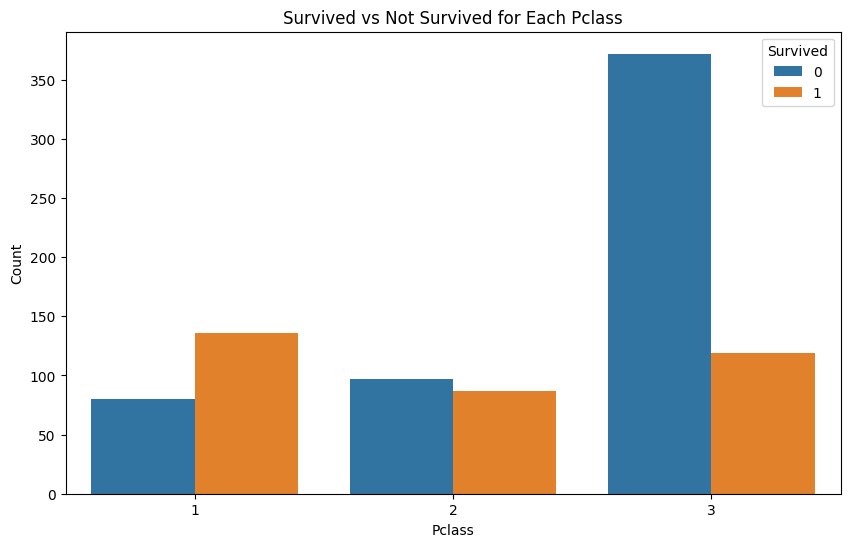

In [114]:
display_correlation(explore, 'Pclass', 'Survived')

### Name

#### Surname

In [115]:
explore['Surname'] = explore['Name'].apply(lambda x: x.split(",")[0])
explore[['Name', 'Surname']].nunique()

Name       891
Surname    667
dtype: int64

Could look at correlation with families, or use to work out if husband/wife are on board (thus splitting sibsp).

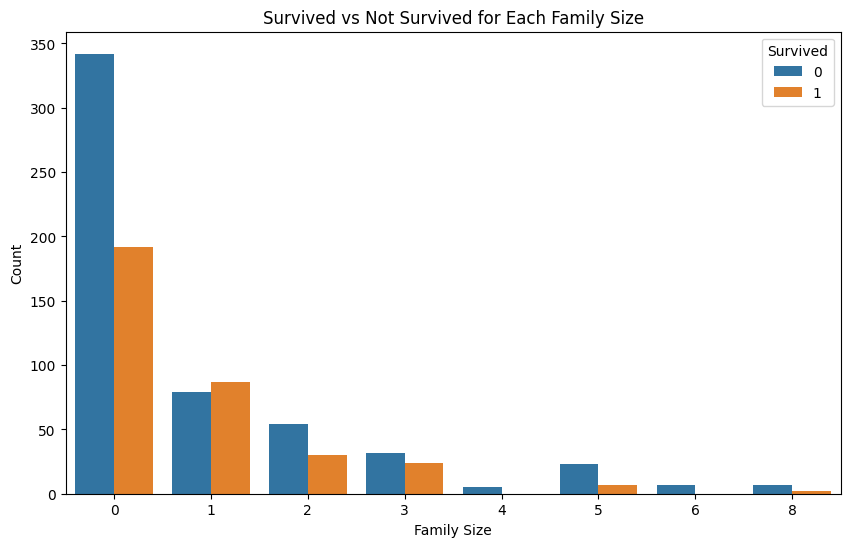

In [121]:
from collections import Counter
surnames = explore['Name'].apply(lambda x: x.split(",")[0])
explore['Family Size'] = surnames.apply(lambda a: Counter(surnames)[a]-1)
display_correlation(explore, 'Family Size', 'Survived')

#### Title

In [82]:
explore['Title'] = explore['Name'].apply(lambda x: x.split(",")[1].split(".")[0])
explore[['Name', 'Title']].nunique()

Name     891
Title     17
dtype: int64

In [83]:
explore['Title'] = explore['Title'].apply(lambda x: x.strip(' ') if x in [' Mr', ' Mrs', ' Miss', ' Master'] else 'Other')

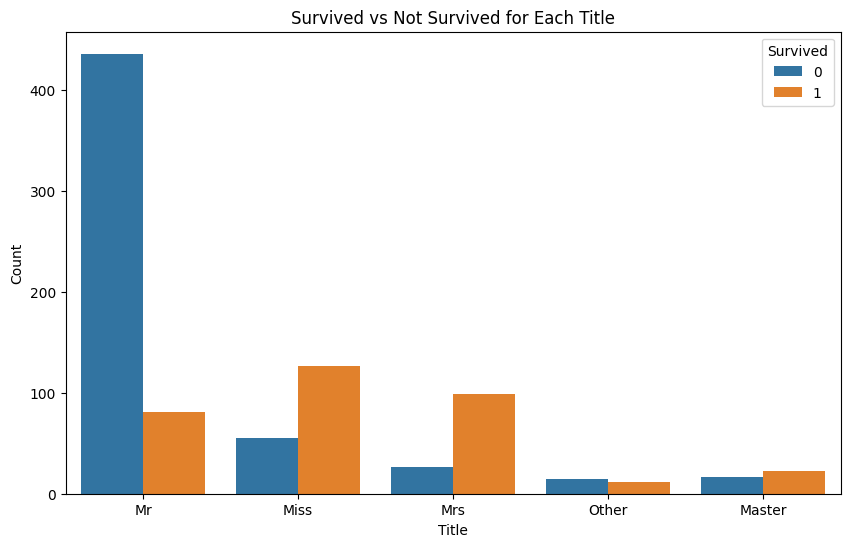

In [84]:
display_correlation(explore, 'Title', 'Survived')

### Sex

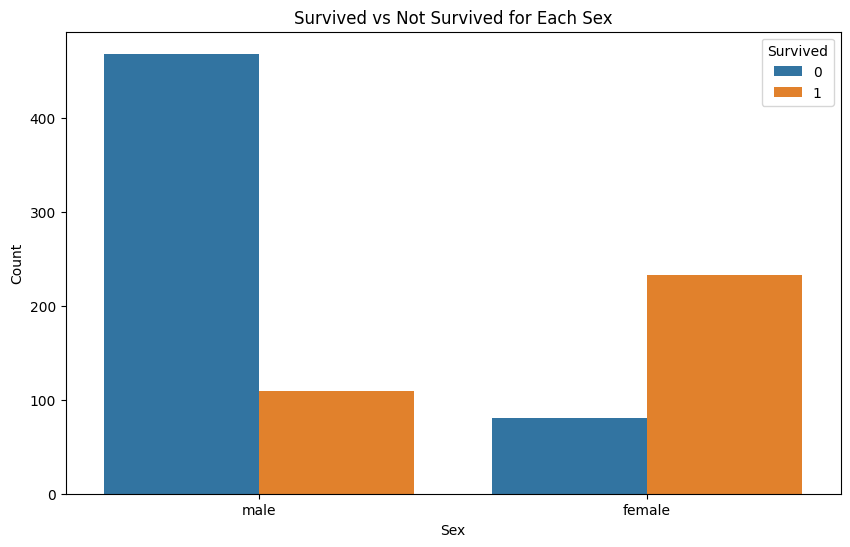

In [85]:
display_correlation(explore, 'Sex', 'Survived')

### Age

In [86]:
def display_hist(x_name, y_name, bins="auto"):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=x_name, hue=y_name, bins=bins)
    plt.show()

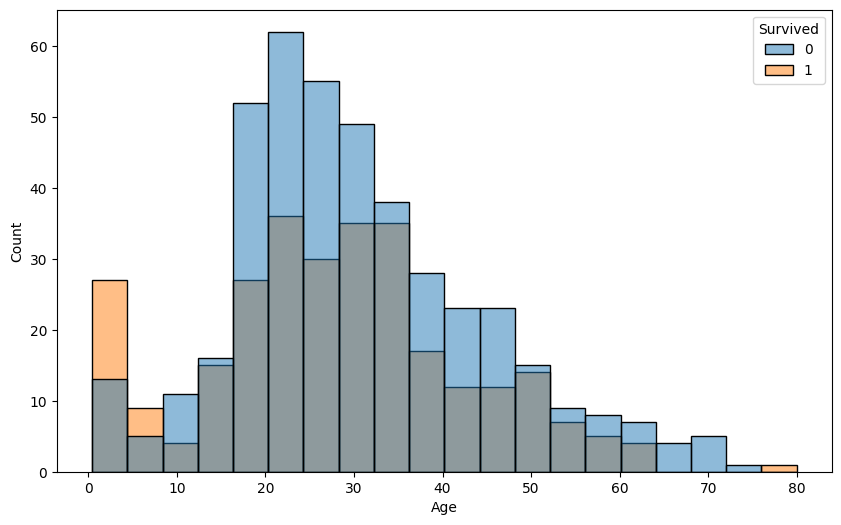

In [87]:
display_hist('Age', 'Survived')

### SibSp

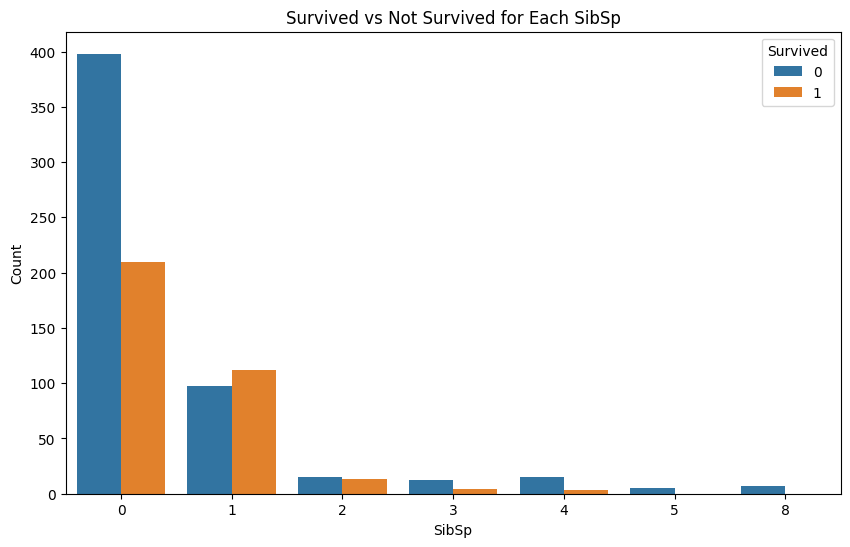

In [122]:
display_correlation(explore, 'SibSp', 'Survived')

### ParCh

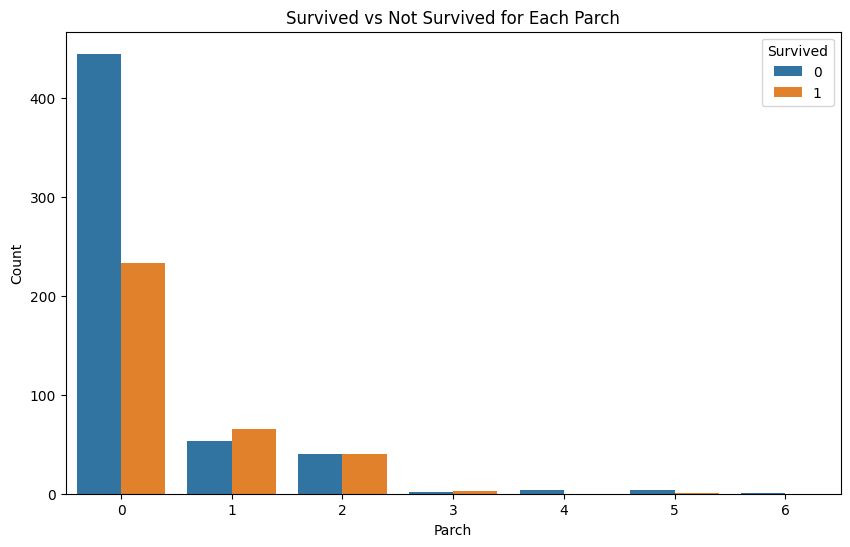

In [123]:
display_correlation(explore, 'Parch', 'Survived')

### Ticket

In [128]:
explore['Ticket'].nunique()

681

In [130]:
sorted(explore['Ticket'])

['110152',
 '110152',
 '110152',
 '110413',
 '110413',
 '110413',
 '110465',
 '110465',
 '110564',
 '110813',
 '111240',
 '111320',
 '111361',
 '111361',
 '111369',
 '111426',
 '111427',
 '111428',
 '112050',
 '112052',
 '112053',
 '112058',
 '112059',
 '112277',
 '112379',
 '113028',
 '113043',
 '113050',
 '113051',
 '113055',
 '113056',
 '113059',
 '113501',
 '113503',
 '113505',
 '113505',
 '113509',
 '113510',
 '113514',
 '113572',
 '113572',
 '113760',
 '113760',
 '113760',
 '113760',
 '113767',
 '113773',
 '113776',
 '113776',
 '113781',
 '113781',
 '113781',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113789',
 '113789',
 '113792',
 '113794',
 '113796',
 '113798',
 '113798',
 '113800',
 '113803',
 '113803',
 '113804',
 '113806',
 '113806',
 '113807',
 '11668',
 '11668',
 '11751',
 '11751',
 '11752',
 '11753',
 '11755',
 '11765',
 '11767',
 '11767',
 '11769',
 '11771',
 '11774',
 '11813',
 '11967',
 '11967',
 '12233',
 '12460',
 '12749',
 '12749',
 '13049'

Clearly some patterns here, groups of numbers very close to each other, and repeated prefix codes. Would be good to split into these groups and compare to cabin/floor. Potential to use distance metric for how close cabins are together (since cabin data is sparse).

### Fare

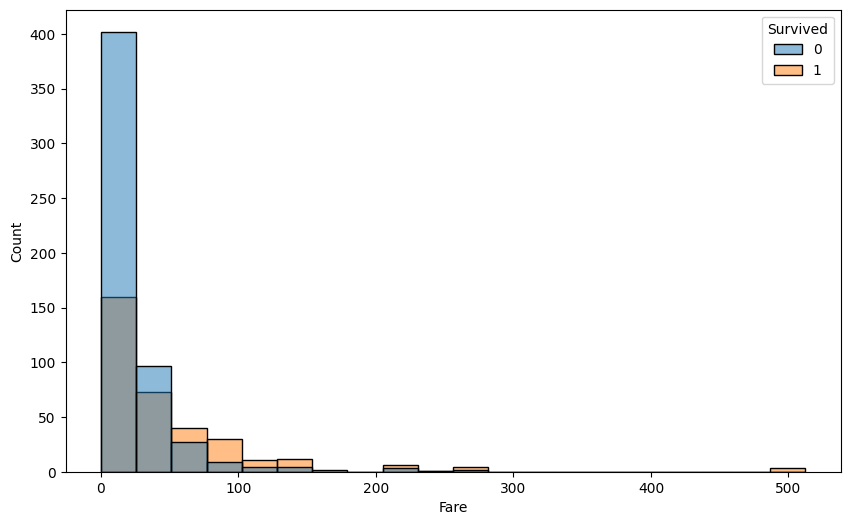

In [90]:
display_hist('Fare', 'Survived', 20)

### Cabin

In [134]:
explore['Cabin'].isna().sum() + explore['Cabin'].nunique()

np.int64(834)

In [132]:
explore['Cabin']

0                  NaN
1                  NaN
2                  NaN
3                  F33
4                  A24
5                  NaN
6                  NaN
7                  NaN
8                  NaN
9                  NaN
10                 NaN
11                 NaN
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 D49
21                 D33
22                 NaN
23                 NaN
24                 NaN
25                 NaN
26                 NaN
27                 NaN
28                 NaN
29                 NaN
30                 NaN
31                 NaN
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 B38
42                 A36
43         

In [93]:
explore['Floor'] = explore['Cabin'].astype(str).apply(lambda x: x[0] if x != "nan" else "nan")
explore[['Cabin', 'Floor']].nunique()

Cabin    147
Floor      9
dtype: int64

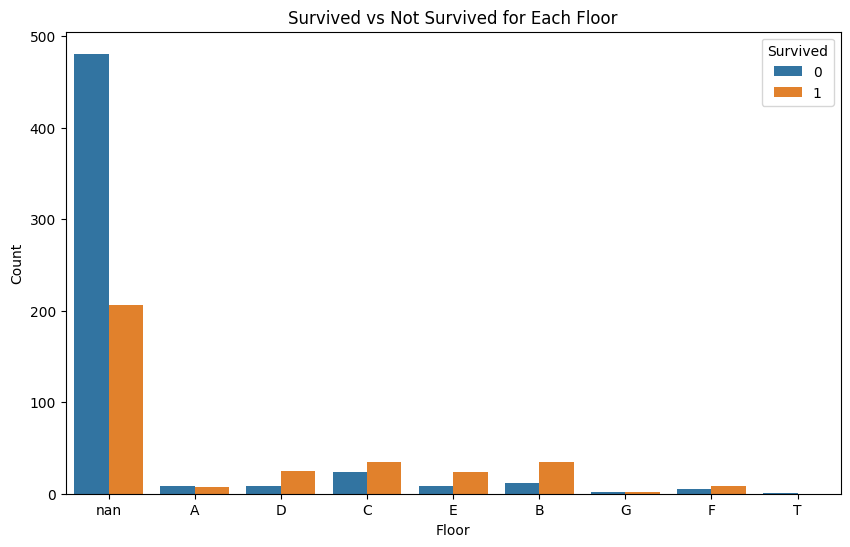

In [94]:
display_correlation(explore, 'Floor', 'Survived')

### Embarked

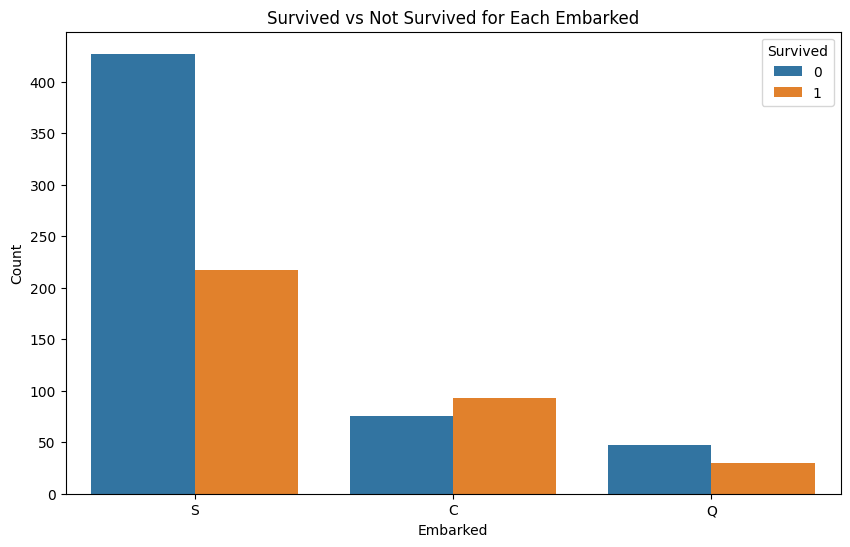

In [96]:
display_correlation(explore, 'Embarked', 'Survived')

### NaN values

In [97]:
explore.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
family_size      0
Title            0
Floor            0
dtype: int64

In [135]:
explore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,family_size,Family Size
0,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0000,NaN,S,Johnson,5,5
1,448,1,1,"Seward, Mr. Frederic Kimber",male,34.00,0,0,113794,26.5500,NaN,S,Seward,0,0
2,70,0,3,"Kink, Mr. Vincenz",male,26.00,2,0,315151,8.6625,NaN,S,Kink,0,0
3,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.00,0,0,C.A. 34260,10.5000,F33,S,Lemore,0,0
4,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.00,0,0,PC 17590,50.4958,A24,S,Roebling,0,0
5,576,0,3,"Patchett, Mr. George",male,19.00,0,0,358585,14.5000,NaN,S,Patchett,0,0
6,477,0,2,"Renouf, Mr. Peter Henry",male,34.00,1,0,31027,21.0000,NaN,S,Renouf,1,1
7,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.50,0,0,364499,8.0500,NaN,S,Tomlin,0,0
8,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,Murphy,1,1
9,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S,Rosblom,1,1


# Preprocessing

In [98]:
def preprocess(df, train=True):
    # df['family_size'] = df['Surname'].apply(lambda x: collections.Counter(df['Surname'])[x]-1)
    df['Title'] = df['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip(' '))
    df['Title'] = df['Title'].apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Floor'] = df['Cabin'].astype(str).apply(lambda x: x[0] if x != "nan" else "nan")
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    if train:
        df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    else:
        df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    return df

In [479]:
trainp = preprocess(train)

# Models

## Random Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier

Abusively treating categorical variables as ordinal (because apparently RFs do fine?).

### Preprocessing

In [468]:
def cat_to_num(df):
    df['Sex'] = df['Sex'].map({'male':0, "female":1})
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
    df['Title'] = df['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})
    df['Floor'] = df['Floor'].map({'nan': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})
    return df

In [531]:
trainp = cat_to_num(trainp)
trainp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Floor
0,0,3,0,18.00,0,0,8.3000,0,0,0
1,0,3,0,28.00,0,0,7.7375,2,0,0
2,1,3,1,4.00,0,1,13.4167,1,2,0
3,1,3,1,15.00,0,0,8.0292,2,2,0
4,0,2,0,19.00,1,1,36.7500,0,0,0
5,0,3,0,28.00,0,0,7.8958,0,0,0
6,1,1,1,38.00,0,0,80.0000,0,2,2
7,0,3,1,28.00,1,0,14.4542,1,2,0
8,0,3,1,9.00,4,2,31.2750,0,2,0
9,1,1,1,56.00,0,1,83.1583,1,1,3


In [532]:
trainx, valx, testx = trainp[:600], trainp[600:800], trainp[800:]

In [533]:
trainxx, trainy = trainx.drop('Survived', axis=1), trainx['Survived']

In [534]:
model = RandomForestClassifier()
model.fit(trainxx,trainy)

RandomForestClassifier()

In [535]:
mval = model.predict(valx.drop('Survived', axis=1))
mtest = model.predict(testx.drop('Survived', axis=1))

In [536]:
from sklearn.metrics import accuracy_score
accuracy_score(valx['Survived'], mval)
accuracy_score(testx['Survived'], mtest)

0.8131868131868132

### Submit

In [537]:
testp = cat_to_num(preprocess(test, False))

In [539]:
model.fit(trainp.drop('Survived', axis=1), trainp['Survived'])
res = model.predict(testp.drop('PassengerId', axis=1))

In [540]:
with open('submission.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for i in range(len(res)):
        f.write(f"{testp['PassengerId'][i]},{res[i]}\n")